# Librerias

In [ ]:
!pip install pyngrok streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
# === Sección 1: Importar librerías ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib
from google.colab import drive
import threading
from pyngrok import ngrok

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)



# Cargar Base de entrenamiento

In [ ]:
file_name = "mental_health_digital_behavior_data (1).csv"

try:
    df = pd.read_csv(file_name, on_bad_lines='skip', delimiter=';')
    print("✅ Archivo cargado exitosamente:", file_name)
    print("Número de filas y columnas:", df.shape)
    display(df.head())
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo. Asegúrate de haber subido 'Test_DT.csv' en la barra lateral de Colab.")

✅ Archivo cargado exitosamente: mental_health_digital_behavior_data (1).csv
Número de filas y columnas: (500, 9)


,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,"389,80","53,00","5,90","89,00","133,20","6,80","8,90","10,00","44,80"
1,"351,70","52,00","7,20","79,00","109,50","5,50","9,40","10,00","43,60"
2,"398,90","39,00","8,00","108,00","84,70","6,70","9,40","9,40","52,60"
3,"451,40","44,00","6,50","78,00","88,90","6,00","9,40","5,10","58,40"
4,"346,00","43,00","6,90","35,00","78,80","8,20","9,40","8,00","59,70"


# Cargar Base del formulario

In [ ]:

# Ruta local (de los archivos de Colab)
ruta_local = '/content/Copia de Evaluación de Bienestar Digital y Salud Mental (respuestas) - Respuestas de formulario 1 (1).csv'

# Cargar el archivo
df_formulario = pd.read_csv(ruta_local)

# Mostrar las primeras filas
df_formulario.head()


,Marca temporal,SECCIÓN 1: Consentimiento informado,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,Dirección de correo electrónico
0,13/07/2025 23:43:44,✅ Declaro que participo de forma voluntaria y ...,200,50,6.0,30,120,6.7,7.0,7.5,NaN
1,13/07/2025 23:49:38,✅ Declaro que participo de forma voluntaria y ...,300,40,4.0,20,200,8.0,7.0,8.0,NaN
2,13/07/2025 23:53:50,✅ Declaro que participo de forma voluntaria y ...,180,20,6.0,60,130,7.0,8.5,6.0,NaN
3,14/07/2025 0:07:32,✅ Declaro que participo de forma voluntaria y ...,95,30,5.0,300,90,6.0,7.0,4.0,NaN
4,14/07/2025 0:07:57,✅ Declaro que participo de forma voluntaria y ...,240,40,5.0,50,180,1.0,3.0,6.0,NaN


# Seccion 1: Clasificador de Riesgo

## Crear variable objetivo

In [ ]:
# === Sección 3: Crear la variable 'at_risk' según la fórmula definida ===
df['anxiety_level'] = df['anxiety_level'].str.replace(',', '.').astype(float)
df['mood_score'] = df['mood_score'].str.replace(',', '.').astype(float)

df['at_risk'] = ((df['anxiety_level'] >= 8) | (df['mood_score'] <= 6)).astype(int)

## Separación de features y target

In [ ]:
# === Sección 4: Definir variables predictoras (X) y variable objetivo (y) ===

# Eliminar columnas no necesarias si las hay, o seleccionar solo las relevantes
X = df.drop(columns=['at_risk'])  # automáticamente toma todas las columnas excepto la de destino
y = df['at_risk']

# En caso de que haya variables categóricas, convertirlas a numéricas (si aplica)
X = pd.get_dummies(X, drop_first=True)  # en caso de que existan columnas categóricas


## Definición del modelo y validación cruzada (10 folds)


Confusion Matrix (Cross-validation):
                     Predicho: 0  Predicho: 1
Real: 0 (No riesgo)          143            5
Real: 1 (Riesgo)               0          352


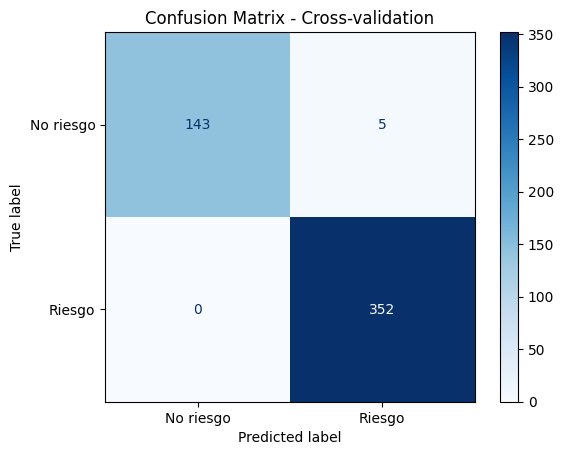

In [ ]:
# === Sección 5: Evaluación con validación cruzada y matriz de confusión ===

# Define the model
model = LogisticRegression()

# Predicciones de validación cruzada (imitando Orange)
y_pred_cv = cross_val_predict(model, X, y, cv=10)

# Calcular matriz de confusión
cm_cv = confusion_matrix(y, y_pred_cv)

# Mostrar la matriz como tabla
print("\nConfusion Matrix (Cross-validation):")
print(pd.DataFrame(cm_cv,
                   index=["Real: 0 (No riesgo)", "Real: 1 (Riesgo)"],
                   columns=["Predicho: 0", "Predicho: 1"]))

# Mostrar visualmente
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cv,
                              display_labels=["No riesgo", "Riesgo"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Cross-validation")
plt.show()

## Guardado del modelo entrenado

In [ ]:
# === SECCIÓN 6: Guardar el modelo entrenado en Google Drive ===

# 1. Montar Google Drive
from google.colab import auth
drive.mount('/content/drive')

# 2. Crear carpeta en tu Drive si no existe
save_path = '/content/drive/MyDrive/Proyecto_Analitica/modelos'
os.makedirs(save_path, exist_ok=True)

# 3. Fit the classification model to the entire training data before saving
model.fit(X, y)

# 4. Guardar el modelo en esa carpeta
model_filename = 'logistic_model_mental_health.pkl'
joblib.dump(model, f'{save_path}/{model_filename}')

print(f"✅ Modelo guardado exitosamente en: {save_path}/{model_filename}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Modelo guardado exitosamente en: /content/drive/MyDrive/Proyecto_Analitica/modelos/logistic_model_mental_health.pkl


# Seccion 2: Prediccion de "Well_digital_being_indicator"

## Eliminar/prevenir el preprocesamiento anterior

In [ ]:
# Eliminar columnas procesadas relacionadas a 'at_risk', si las hay
cols_to_drop = [col for col in df.columns if 'at_risk' in col.lower() and col != 'at_risk']
df.drop(columns=cols_to_drop, inplace=True)

# Si at_risk fue transformada y quieres restaurarla a valores originales (por ejemplo, texto), hazlo aquí:
# Ejemplo si se codificó: 1 = 'At risk', 0 = 'No risk'
if 'at_risk' in df.columns and df['at_risk'].dtype in [int, float]:
    df['at_risk'] = df['at_risk'].map({1: 'At risk', 0: 'No risk'})

# Mostrar columnas actuales
print("Columnas después de limpiar:", df.columns.tolist())


Columnas después de limpiar: ['daily_screen_time_min', 'num_app_switches', 'sleep_hours', 'notification_count', 'social_media_time_min', 'focus_score', 'mood_score', 'anxiety_level', 'digital_wellbeing_score', 'at_risk']


## Calcular la correlación de todas las variables con "Well_digital_being_indicator"

In [ ]:


# Asegurar que los valores con comas se conviertan correctamente a numéricos
for col in ['daily_screen_time_min', 'num_app_switches', 'sleep_hours', 'notification_count', 'social_media_time_min', 'focus_score', 'digital_wellbeing_score']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Filtrar solo columnas numéricas
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

# Verificar si existe la columna objetivo
if 'digital_wellbeing_score' in correlation_matrix.columns:
    well_being_corr = correlation_matrix['digital_wellbeing_score'].drop('digital_wellbeing_score', errors='ignore')

    # Crear tabla con el signo de la correlación
    correlation_df = pd.DataFrame({
        'Variable': well_being_corr.index,
        'Correlation': well_being_corr.values
    })

    # Ordenar por valor absoluto, manteniendo el signo
    correlation_df['AbsCorrelation'] = correlation_df['Correlation'].abs()
    correlation_df = correlation_df.sort_values(by='AbsCorrelation', ascending=False).drop(columns='AbsCorrelation').reset_index(drop=True)

    # Mostrar tabla
    display(correlation_df)


,Variable,Correlation
0,anxiety_level,-0.836476
1,sleep_hours,0.440426
2,focus_score,0.411266
3,notification_count,-0.379679
4,social_media_time_min,-0.262681
5,mood_score,0.127360
6,daily_screen_time_min,-0.087824
7,num_app_switches,-0.080687


## Seleccion de features y entrenamiento del modelo de regresion lineal

In [ ]:

# 1. Seleccionar automáticamente las top 3 features
top_3 = correlation_df['Variable'].iloc[:3].tolist()

# Filtrar datos, eliminando filas con NaN en las variables seleccionadas
df_model = df[top_3 + ['digital_wellbeing_score']].dropna()

# Definir X e y
X = df_model[top_3]
y = df_model['digital_wellbeing_score']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# 2. Mostrar coeficientes en tabla
coef_df = pd.DataFrame({
    'Variable': top_3,
    'Coeficiente': model.coef_.round(4)
})
coef_df.loc[len(coef_df)] = ['Intercepto', round(model.intercept_, 4)]
print("📊 Coeficientes del modelo:\n")
display(coef_df)

# 3. Mostrar métricas en tabla
metrics_df = pd.DataFrame({
    'Métrica': ['R²', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Valor': [round(v, 4) for v in [r2, mse, rmse, mae, mape]]
})
print("📈 Métricas del modelo en conjunto de prueba:\n")
display(metrics_df)


📊 Coeficientes del modelo:



,Variable,Coeficiente
0,anxiety_level,-2.9991
1,sleep_hours,2.9953
2,focus_score,3.9826
3,Intercepto,30.1514


📈 Métricas del modelo en conjunto de prueba:



,Métrica,Valor
0,R²,0.9995
1,MSE,0.0309
2,RMSE,0.1757
3,MAE,0.1433
4,MAPE (%),0.2844


## Guardado de modelo entrenado

In [ ]:
# 1. Asegúrate de tener montado Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 2. Crear carpeta en tu Drive si no existe
save_path = '/content/drive/MyDrive/Proyecto_Analitica/modelos'
os.makedirs(save_path, exist_ok=True)

# 3. Guardar el modelo
model_filename = 'modelo_regresion_lineal_digital_wellbeing.pkl'
joblib.dump(model, f'{save_path}/{model_filename}')

print(f"✅ Modelo guardado exitosamente en: {save_path}/{model_filename}")

Mounted at /content/drive
✅ Modelo guardado exitosamente en: /content/drive/MyDrive/Proyecto_Analitica/modelos/modelo_regresion_lineal_digital_wellbeing.pkl


# Seccion 3: Aplicacion de los modelos en la base de datos del formulario

# Cargar modelos y predecir en una nueva base de datos real

In [ ]:

# Ruta base de los modelos
modelos_path = '/content/drive/MyDrive/Proyecto_Analitica/modelos/'

# Cargar modelo de riesgo mental (clasificación)
modelo_riesgo = joblib.load(os.path.join(modelos_path, 'logistic_model_mental_health.pkl'))

# Cargar modelo de bienestar digital (regresión)
modelo_bienestar = joblib.load(os.path.join(modelos_path, 'modelo_regresion_lineal_digital_wellbeing.pkl'))

print("✅ Modelos cargados correctamente.")

✅ Modelos cargados correctamente.


## Aplicar modelos

In [ ]:

# 1. Montar Google Drive
try:
    drive.mount('/content/drive', force_remount=True)
    print("✅ Google Drive montado correctamente.")
except Exception as e:
    print(f"❌ Error al montar Google Drive: {e}")
    print("Por favor, asegúrate de estar ejecutando esto en Google Colab y de haber autorizado el acceso a Drive.")
    exit()

# Ruta base donde se guardaron los modelos
modelos_path = '/content/drive/MyDrive/Proyecto_Analitica/modelos/'

# Cargar modelo de riesgo mental (clasificación)
try:
    modelo_riesgo = joblib.load(modelos_path + 'logistic_model_mental_health.pkl')
    print("✅ Modelo de riesgo mental (clasificación) cargado correctamente.")
except FileNotFoundError:
    print(f"❌ Error: No se encontró el modelo de riesgo mental en {modelos_path}logistic_model_mental_health.pkl")
    print("Asegúrate de haber ejecutado la sección de guardado del modelo de riesgo previamente y que la ruta sea correcta.")
    exit()

# Cargar modelo de bienestar digital (regresión)
try:
    modelo_bienestar = joblib.load(modelos_path + 'modelo_regresion_lineal_digital_wellbeing.pkl')
    print("✅ Modelo de bienestar digital (regresión) cargado correctamente.")
except FileNotFoundError:
    print(f"❌ Error: No se encontró el modelo de bienestar digital en {modelos_path}modelo_regresion_lineal_digital_wellbeing.pkl")
    print("Asegúrate de haber ejecutado la sección de guardado del modelo de regresión previamente y que la ruta sea correcta.")
    exit()

# Cargar el archivo df_formulario
ruta_local_formulario = '/content/Copia de Evaluación de Bienestar Digital y Salud Mental (respuestas) - Respuestas de formulario 1 (1).csv'
try:
    df_formulario = pd.read_csv(ruta_local_formulario)
    print(f"✅ Archivo '{os.path.basename(ruta_local_formulario)}' cargado exitosamente.")
    print("Número de filas y columnas del formulario:", df_formulario.shape)
except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo '{os.path.basename(ruta_local_formulario)}' en {ruta_local_formulario}.")
    print("Asegúrate de haber subido el archivo a la ruta '/content/' en Colab o de que la ruta sea correcta.")
    exit()

# --- 1. Crear la variable 'at_risk' en df_formulario ---
print("--- Creando la variable 'at_risk' en df_resultados ---")

df_resultados = df_formulario.copy()

for col in ['anxiety_level', 'mood_score']:
    if col in df_resultados.columns:
        df_resultados[col] = df_resultados[col].astype(str).str.replace(',', '.', regex=False)
        df_resultados[col] = pd.to_numeric(df_resultados[col], errors='coerce')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en df_resultados. La variable 'at_risk' podría no calcularse correctamente.")

initial_rows_at_risk = df_resultados.shape[0]
df_resultados.dropna(subset=['anxiety_level', 'mood_score'], inplace=True)
if df_resultados.shape[0] < initial_rows_at_risk:
    print(f"Se eliminaron {initial_rows_at_risk - df_resultados.shape[0]} filas con valores NaN en 'anxiety_level' o 'mood_score' para el cálculo de 'at_risk'.")

df_resultados['at_risk'] = ((df_resultados['anxiety_level'] >= 8) | (df_resultados['mood_score'] <= 6)).astype(int)

print("✅ Variable 'at_risk' creada en df_resultados.")
print("Primeras 5 filas con la nueva variable 'at_risk' (calculada):")
display(df_resultados[['anxiety_level', 'mood_score', 'at_risk']].head())
print(f"Conteo de valores para 'at_risk' (calculada):\n{df_resultados['at_risk'].value_counts()}")

# --- 2. Aplicar el modelo de clasificación (modelo_riesgo) para predecir 'at_risk' ---
print("\n--- Aplicando el modelo de clasificación para predecir 'at_risk' ---")

X_clasificacion_para_prediccion = df_resultados.copy()

if 'at_risk' in X_clasificacion_para_prediccion.columns:
    X_clasificacion_para_prediccion = X_clasificacion_para_prediccion.drop(columns=['at_risk'])

X_clasificacion_para_prediccion = pd.get_dummies(X_clasificacion_para_prediccion, drop_first=True)

if hasattr(modelo_riesgo, 'feature_names_in_'):
    training_cols_clasificacion = modelo_riesgo.feature_names_in_
    X_clasificacion_para_prediccion = X_clasificacion_para_prediccion.reindex(columns=training_cols_clasificacion, fill_value=0)
    print("✅ Columnas para la predicción de clasificación alineadas con el entrenamiento.")
else:
    print("⚠️ Advertencia: No se pudo obtener 'feature_names_in_' del modelo de riesgo. La alineación de columnas podría ser incorrecta.")
    print("Esto podría causar errores si las columnas no coinciden exactamente con las de entrenamiento.")

_at_risk_predicho = modelo_riesgo.predict(X_clasificacion_para_prediccion)
_probabilidad_at_risk_predicha = modelo_riesgo.predict_proba(X_clasificacion_para_prediccion)[:, 1]

print("✅ Predicciones de 'at_risk' generadas por el modelo de clasificación (no añadidas a la tabla final según tu solicitud).")
print(f"Conteo de 'at_risk' predicho por el modelo (solo para referencia):\n{pd.Series(_at_risk_predicho).value_counts()}")

# --- 3. Seleccionar features y aplicar el modelo de regresión para 'Índice de Bienestar Digital' ---
print("\n--- Calculando el 'Índice de Bienestar Digital' con el modelo de regresión ---")

features_regresion_nuevas = ['anxiety_level', 'sleep_hours', 'focus_score']

for col in features_regresion_nuevas:
    if col in df_resultados.columns:
        df_resultados[col] = df_resultados[col].astype(str).str.replace(',', '.', regex=False)
        df_resultados[col] = pd.to_numeric(df_resultados[col], errors='coerce')
    else:
        print(f"Advertencia: La columna '{col}' no se encontró en df_resultados para el cálculo del Índice de Bienestar Digital.")

df_regresion_para_prediccion = df_resultados.dropna(subset=features_regresion_nuevas).copy()

if df_regresion_para_prediccion.empty:
    print("❌ No hay datos suficientes para calcular el 'Índice de Bienestar Digital' después de eliminar NaNs en las características clave seleccionadas.")
    df_resultados['digital_wellbeing_score'] = np.nan
else:
    X_regresion_para_prediccion = df_regresion_para_prediccion[features_regresion_nuevas]

    if hasattr(modelo_bienestar, 'feature_names_in_'):
        training_cols_regresion = modelo_bienestar.feature_names_in_
        if sorted(features_regresion_nuevas) != sorted(list(training_cols_regresion)):
            print("⚠️ Advertencia: Las features solicitadas para el Índice de Bienestar Digital no son las mismas que el modelo de regresión fue entrenado.")
            print(f"Features solicitadas: {features_regresion_nuevas}")
            print(f"Features de entrenamiento del modelo: {list(training_cols_regresion)}")
            print("El modelo de regresión original fue entrenado con otras características. El resultado puede no ser óptimo.")
        X_regresion_para_prediccion = X_regresion_para_prediccion.reindex(columns=training_cols_regresion, fill_value=0)
        print("✅ Columnas para la predicción de regresión alineadas con el entrenamiento (si es necesario).")
    else:
        print("⚠️ Advertencia: No se pudo obtener 'feature_names_in_' del modelo de bienestar. La alineación de columnas podría ser incorrecta.")

    df_regresion_para_prediccion['digital_wellbeing_score'] = modelo_bienestar.predict(X_regresion_para_prediccion)

    df_resultados = df_resultados.merge(
        df_regresion_para_prediccion[['digital_wellbeing_score']],
        left_index=True,
        right_index=True,
        how='left'
    )
    print("✅ 'Índice de Bienestar Digital' calculado y añadido a df_resultados como 'digital_wellbeing_score'.")
    print("Primeras 5 filas con el nuevo 'digital_wellbeing_score':")
    display(df_resultados[features_regresion_nuevas + ['digital_wellbeing_score']].head())
    print("\nEstadísticas descriptivas del 'digital_wellbeing_score':")
    print(df_resultados['digital_wellbeing_score'].describe())

# --- Mapear 'at_risk' a texto para mejor legibilidad ---
print("\n--- Convirtiendo la columna 'at_risk' a formato legible (Riesgo/No riesgo) ---")
df_resultados['at_risk'] = df_resultados['at_risk'].map({1: 'Riesgo', 0: 'No riesgo'})
print("✅ Columna 'at_risk' actualizada a texto.")

print("\n--- Proceso completado. El DataFrame 'df_resultados' contiene la nueva variable 'at_risk' (en texto) y 'digital_wellbeing_score'. ---")

## ✨ Mostrar la Tabla Final df_resultados ✨
print("\n### Tabla Final 'df_resultados' con todas las variables generadas: ###")
display(df_resultados.head())

print(f"\nNúmero total de filas y columnas en la tabla final: {df_resultados.shape}")
print("Columnas finales en 'df_resultados':")
print(df_resultados.columns.tolist())

## 💾 Guardando la Tabla Final en Google Drive (Formato XLSX)

# La celda anterior ya montó Google Drive. Aseguramos que pandas esté disponible.
import os
import pandas as pd

# Definir la ruta y el nombre del archivo
save_directory = '/content/drive/MyDrive/Proyecto_Analitica/Bases de Datos/'
file_name = 'Resultados Finales(Python).xlsx'
full_path = os.path.join(save_directory, file_name)

# Crear la carpeta si no existe
try:
    os.makedirs(save_directory, exist_ok=True)
    print(f"✅ Directorio '{save_directory}' verificado/creado.")
except OSError as e:
    print(f"❌ Error al crear el directorio '{save_directory}': {e}")
    print("No se podrá guardar el archivo.")
    exit()

# Guardar el DataFrame df_resultados como archivo XLSX
try:
    # Asegúrate de que df_resultados existe en el entorno
    if 'df_resultados' in locals() or 'df_resultados' in globals():
        df_resultados.to_excel(full_path, index=False)
        print(f"🎉 ¡Éxito! La tabla final ha sido guardada en:\n👉 {full_path}")
    else:
        print("❌ Error: 'df_resultados' no se encontró. Asegúrate de ejecutar la celda anterior primero.")
except Exception as e:
    print(f"❌ Error al guardar el archivo XLSX: {e}")
    print("Asegúrate de que 'df_resultados' sea un DataFrame válido.")

Mounted at /content/drive
✅ Google Drive montado correctamente.
✅ Modelo de riesgo mental (clasificación) cargado correctamente.
✅ Modelo de bienestar digital (regresión) cargado correctamente.
✅ Archivo 'Copia de Evaluación de Bienestar Digital y Salud Mental (respuestas) - Respuestas de formulario 1 (1).csv' cargado exitosamente.
Número de filas y columnas del formulario: (51, 11)
--- Creando la variable 'at_risk' en df_resultados ---
✅ Variable 'at_risk' creada en df_resultados.
Primeras 5 filas con la nueva variable 'at_risk' (calculada):


,anxiety_level,mood_score,at_risk
0,7.5,7.0,0
1,8.0,7.0,1
2,6.0,8.5,0
3,4.0,7.0,0
4,6.0,3.0,1


Conteo de valores para 'at_risk' (calculada):
at_risk
1    30
0    21
Name: count, dtype: int64

--- Aplicando el modelo de clasificación para predecir 'at_risk' ---
✅ Columnas para la predicción de clasificación alineadas con el entrenamiento.
✅ Predicciones de 'at_risk' generadas por el modelo de clasificación (no añadidas a la tabla final según tu solicitud).
Conteo de 'at_risk' predicho por el modelo (solo para referencia):
0    32
1    19
Name: count, dtype: int64

--- Calculando el 'Índice de Bienestar Digital' con el modelo de regresión ---
✅ Columnas para la predicción de regresión alineadas con el entrenamiento (si es necesario).
✅ 'Índice de Bienestar Digital' calculado y añadido a df_resultados como 'digital_wellbeing_score'.
Primeras 5 filas con el nuevo 'digital_wellbeing_score':


,anxiety_level,sleep_hours,focus_score,digital_wellbeing_score
0,7.5,6.0,6.7,52.313779
1,8.0,4.0,8.0,50.001100
2,6.0,6.0,7.0,58.007189
3,4.0,5.0,6.0,57.027407
4,6.0,5.0,1.0,31.116020



Estadísticas descriptivas del 'digital_wellbeing_score':
count    51.000000
mean     55.871945
std      10.815962
min      23.102357
25%      49.268889
50%      55.991681
75%      64.245031
max      76.981436
Name: digital_wellbeing_score, dtype: float64

--- Convirtiendo la columna 'at_risk' a formato legible (Riesgo/No riesgo) ---
✅ Columna 'at_risk' actualizada a texto.

--- Proceso completado. El DataFrame 'df_resultados' contiene la nueva variable 'at_risk' (en texto) y 'digital_wellbeing_score'. ---

### Tabla Final 'df_resultados' con todas las variables generadas: ###


,Marca temporal,SECCIÓN 1: Consentimiento informado,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,Dirección de correo electrónico,at_risk,digital_wellbeing_score
0,13/07/2025 23:43:44,✅ Declaro que participo de forma voluntaria y ...,200,50,6.0,30,120,6.7,7.0,7.5,NaN,No riesgo,52.313779
1,13/07/2025 23:49:38,✅ Declaro que participo de forma voluntaria y ...,300,40,4.0,20,200,8.0,7.0,8.0,NaN,Riesgo,50.001100
2,13/07/2025 23:53:50,✅ Declaro que participo de forma voluntaria y ...,180,20,6.0,60,130,7.0,8.5,6.0,NaN,No riesgo,58.007189
3,14/07/2025 0:07:32,✅ Declaro que participo de forma voluntaria y ...,95,30,5.0,300,90,6.0,7.0,4.0,NaN,No riesgo,57.027407
4,14/07/2025 0:07:57,✅ Declaro que participo de forma voluntaria y ...,240,40,5.0,50,180,1.0,3.0,6.0,NaN,Riesgo,31.116020



Número total de filas y columnas en la tabla final: (51, 13)
Columnas finales en 'df_resultados':
['Marca temporal', 'SECCIÓN 1: Consentimiento informado', 'daily_screen_time_min', 'num_app_switches', 'sleep_hours', 'notification_count', 'social_media_time_min', 'focus_score', 'mood_score', 'anxiety_level', 'Dirección de correo electrónico', 'at_risk', 'digital_wellbeing_score']
✅ Directorio '/content/drive/MyDrive/Proyecto_Analitica/Bases de Datos/' verificado/creado.
🎉 ¡Éxito! La tabla final ha sido guardada en:
👉 /content/drive/MyDrive/Proyecto_Analitica/Bases de Datos/Resultados Finales(Python).xlsx


## Guardar Resultados

In [ ]:

# Montar Google Drive (se asume que ya está montado de celdas anteriores, pero se incluye por seguridad)
try:
    drive.mount('/content/drive', force_remount=True)
    print("✅ Google Drive montado para guardar la tabla final.")
except Exception as e:
    print(f"❌ Error al montar Google Drive: {e}")
    print("No se podrá guardar el archivo sin acceso a Drive.")
    exit()

# Definir la ruta y el nombre del archivo
save_directory = '/content/drive/MyDrive/Proyecto_Analitica/Bases de Datos/'
file_name = 'Resultados Finales(Python).xlsx'
full_path = os.path.join(save_directory, file_name)

# Crear la carpeta si no existe
try:
    os.makedirs(save_directory, exist_ok=True)
    print(f"✅ Directorio '{save_directory}' verificado/creado.")
except OSError as e:
    print(f"❌ Error al crear el directorio '{save_directory}': {e}")
    print("No se podrá guardar el archivo.")
    exit()

# Guardar el DataFrame df_resultados como archivo XLSX
try:
    df_resultados.to_excel(full_path, index=False)
    print(f"🎉 ¡Éxito! La tabla final ha sido guardada en:\n👉 {full_path}")
except Exception as e:
    print(f"❌ Error al guardar el archivo XLSX: {e}")
    print("Asegúrate de que 'df_resultados' exista y sea un DataFrame válido.")

Mounted at /content/drive
✅ Google Drive montado para guardar la tabla final.
✅ Directorio '/content/drive/MyDrive/Proyecto_Analitica/Bases de Datos/' verificado/creado.
🎉 ¡Éxito! La tabla final ha sido guardada en:
👉 /content/drive/MyDrive/Proyecto_Analitica/Bases de Datos/Resultados Finales(Python).xlsx


#Aplicacion en streamlit

In [ ]:
# Pega tu token aquí directamente
ngrok.set_auth_token("30F7WvXOi9Dx2S9giu6htbGTuyw_83EgfsjVFZG77VGggUFdd")

# Kill any existing ngrok tunnels
ngrok.kill()

# Crea el túnel correctamente en el puerto 8501
public_url = ngrok.connect(8501) # Pass the port as the first argument
print("Streamlit URL:", public_url)

# Lanza Streamlit en segundo plano
def run_streamlit():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run_streamlit)
thread.start()


# Escribimos el archivo app.py con todo tu código Streamlit
app_code = """
import streamlit as st
import joblib
import numpy as np
import os

modelos_path = '/content/drive/MyDrive/Proyecto_Analitica/modelos/'

try:
    modelo_riesgo = joblib.load(os.path.join(modelos_path, 'logistic_model_mental_health.pkl'))
    modelo_bienestar = joblib.load(os.path.join(modelos_path, 'modelo_regresion_lineal_digital_wellbeing.pkl'))
except FileNotFoundError as e:
    st.error(f"Error cargando modelos: {e}. Verifica que los archivos existan y Drive esté montado.")
    st.stop()
except Exception as e:
    st.error(f"Ocurrió un error inesperado cargando modelos: {e}")
    st.stop()

st.title("🧠 Evaluación de Bienestar Digital y Riesgo Mental")
st.header("Introduce tus datos:")

daily_screen_time_min = st.number_input("¿Cuántos minutos al día usas el celular o computador?", min_value=0, value=240)
num_app_switches = st.number_input("¿Cuántas veces cambias entre aplicaciones en un día?", min_value=0, value=50)
social_media_time_min = st.number_input("¿Cuántos minutos usas redes sociales diariamente?", min_value=0, value=100)
notification_count = st.number_input("¿Cuántas notificaciones de redes sociales recibes al día?", min_value=0, value=150)
sleep_hours = st.number_input("¿Cuántas horas duermes por noche?", min_value=0.0, max_value=24.0, value=7.0)
focus_score = st.slider("¿Qué tan enfocado(a) te sentiste esta semana?", 1, 10, value=7)
anxiety_level = st.slider("¿Qué tan ansioso(a) o estresado(a) te sentiste esta semana?", 1, 10, value=6)
mood_score = st.slider("¿Cómo calificarías tu estado de ánimo general esta semana?", 1, 10, value=8)

if st.button("Evaluar"):
    input_data_dict = {
        'daily_screen_time_min': daily_screen_time_min,
        'num_app_switches': num_app_switches,
        'sleep_hours': sleep_hours,
        'notification_count': notification_count,
        'social_media_time_min': social_media_time_min,
        'focus_score': focus_score,
        'mood_score': mood_score,
        'anxiety_level': anxiety_level
    }

    import pandas as pd
    entrada_clasificacion_df = pd.DataFrame([input_data_dict])

    if hasattr(modelo_riesgo, 'feature_names_in_'):
        expected_cols_riesgo = list(modelo_riesgo.feature_names_in_)
        entrada_clasificacion_df = entrada_clasificacion_df.reindex(columns=expected_cols_riesgo, fill_value=0)
    else:
        st.warning("No se puede verificar el orden de columnas para el modelo de riesgo.")
        if entrada_clasificacion_df.shape[1] != 8:
            st.error(f"Número inesperado de columnas: {entrada_clasificacion_df.shape[1]}. Se esperaban 8.")
            st.stop()

    entrada_regresion = np.array([[anxiety_level, sleep_hours, focus_score]])

    riesgo_pred = modelo_riesgo.predict(entrada_clasificacion_df)[0]
    probabilidad_riesgo = modelo_riesgo.predict_proba(entrada_clasificacion_df)[:, 1][0]

    if hasattr(modelo_bienestar, 'feature_names_in_'):
        entrada_regresion_df = pd.DataFrame([[anxiety_level, sleep_hours, focus_score]], columns=['anxiety_level', 'sleep_hours', 'focus_score'])
        entrada_regresion_df = entrada_regresion_df.reindex(columns=modelo_bienestar.feature_names_in_, fill_value=0)
        bienestar = modelo_bienestar.predict(entrada_regresion_df)[0]
    else:
        bienestar = modelo_bienestar.predict(entrada_regresion)[0]

    st.subheader("📊 Resultados de la Evaluación:")
    riesgo_texto = 'Sí, hay un riesgo potencial' if riesgo_pred == 1 else 'No, el riesgo es bajo'
    st.markdown(f"**🧠 Riesgo Mental:** {riesgo_texto}")
    st.info(f"*(Probabilidad de Riesgo: {probabilidad_riesgo:.2%})*")

    st.markdown(f"**📱 Puntaje de Bienestar Digital:** {bienestar:.2f}")
    if bienestar >= 70:
        st.success("¡Excelente! Tu bienestar digital parece muy saludable.")
    elif bienestar >= 50:
        st.info("Buen trabajo, tu bienestar digital es moderado.")
    else:
        st.warning("Considera revisar tus hábitos digitales para mejorar tu bienestar.")

    st.markdown("---")
    st.markdown("Estos resultados son una estimación y no sustituyen la evaluación de un profesional.")
"""

# Escribe el archivo app.py
with open("app.py", "w") as f:
    f.write(app_code)

# Conecta el túnel ngrok y ejecuta Streamlit
public_url = ngrok.connect(8501) # Pass the port as the first argument
print("✅ Tu aplicación está disponible en:", public_url)

# Lanza Streamlit en segundo plano
!streamlit run app.py &> /content/logs.txt &

Streamlit URL: NgrokTunnel: "https://e4d0ead8fd4a.ngrok-free.app" -> "http://localhost:8501"
✅ Tu aplicación está disponible en: NgrokTunnel: "https://73050dce335d.ngrok-free.app" -> "http://localhost:8501"
